In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load the training data
train_data = pd.read_csv('mnist_train.csv')
X_train = train_data.drop('label', axis=1).values
Y_train = train_data['label'].values

In [3]:
# Load the testing data
test_data = pd.read_csv('mnist_test.csv')
X_test = test_data.drop('label', axis=1).values
Y_test = test_data['label'].values

In [4]:
# Reshape the data
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [5]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [6]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [7]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [8]:
sgd = SGD(0.01)
epochs = 11  # Change epochs to 11
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=128)


Epoch 1/11


469/469 [==============================] - 3s 5ms/step - loss: 2.2957 - accuracy: 0.1644 - val_loss: 2.2515 - val_accuracy: 0.2521
Epoch 2/11
469/469 [==============================] - 2s 4ms/step - loss: 2.2253 - accuracy: 0.3154 - val_loss: 2.1936 - val_accuracy: 0.3662
Epoch 3/11
469/469 [==============================] - 2s 5ms/step - loss: 2.1589 - accuracy: 0.4478 - val_loss: 2.1146 - val_accuracy: 0.5107
Epoch 4/11
469/469 [==============================] - 2s 5ms/step - loss: 2.0656 - accuracy: 0.5236 - val_loss: 2.0033 - val_accuracy: 0.5753
Epoch 5/11
469/469 [==============================] - 2s 5ms/step - loss: 1.9383 - accuracy: 0.5762 - val_loss: 1.8577 - val_accuracy: 0.6157
Epoch 6/11
469/469 [==============================] - 2s 5ms/step - loss: 1.7815 - accuracy: 0.6171 - val_loss: 1.6887 - val_accuracy: 0.6477
Epoch 7/11
469/469 [==============================] - 2s 5ms/step - loss: 1.6082 - accuracy: 0.6541 - val_loss: 1.5107 - val_accuracy: 0.6692
Epoc

In [9]:
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))


79/79 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       980
           1       0.78      0.98      0.87      1135
           2       0.81      0.70      0.75      1032
           3       0.75      0.86      0.80      1010
           4       0.69      0.83      0.75       982
           5       0.79      0.51      0.62       892
           6       0.81      0.88      0.84       958
           7       0.78      0.89      0.83      1028
           8       0.84      0.63      0.72       974
           9       0.74      0.52      0.61      1009

    accuracy                           0.78     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.78      0.77     10000



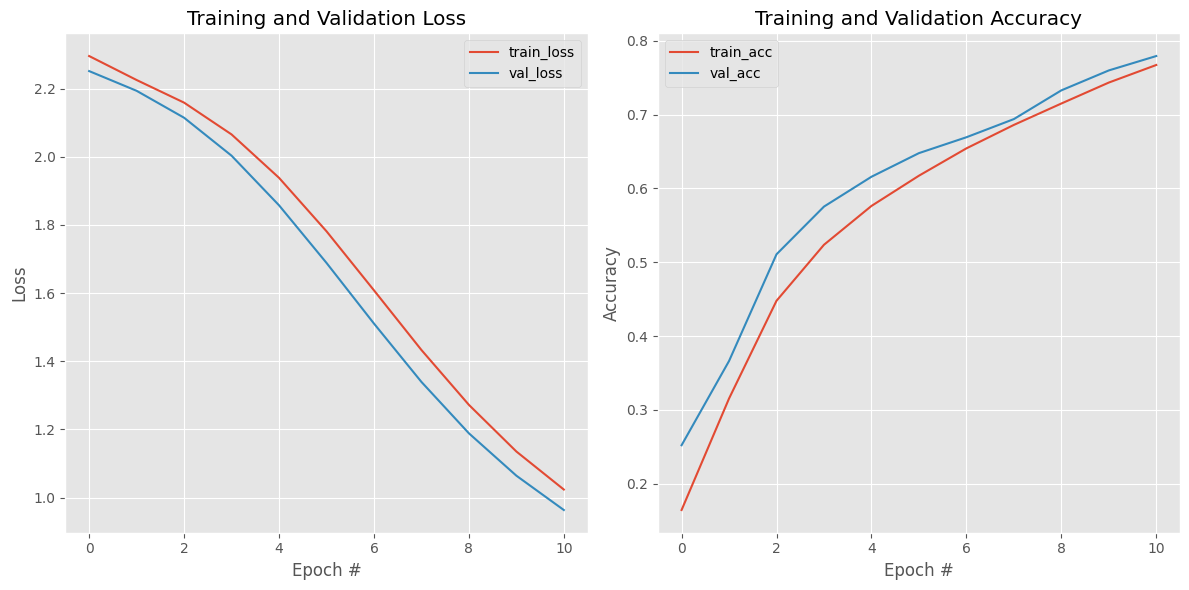

In [10]:
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))  # Added figsize to control the figure size
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()